In [110]:
## importing library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import joblib

In [56]:
data = pd.read_csv("D:/Lecture file/25 th lecture 29 march/KNN Assignment/bangalore house price prediction.csv")
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [60]:
data.shape

(7120, 108)

In [62]:
X = data.iloc[:, data.columns != 'price']
X

,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,1672.0,3,8971.291866,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,1750.0,3,8514.285714,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1750.0,3,8571.428571,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1250.0,2,3200.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1200.0,2,6916.666667,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,2900.0,3,11206.896552,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,1780.0,3,4765.730337,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,880.0,2,5454.545455,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,1000.0,2,5500.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = data['price']
y

0       150.00
1       149.00
2       150.00
3        40.00
4        83.00
         ...  
7115    325.00
7116     84.83
7117     48.00
7118     55.00
7119     78.00
Name: price, Length: 7120, dtype: float64

## Training and testing of bangalore house price prediction data 

In [112]:
scaler = StandardScaler()

In [114]:
X_scaled = scaler.fit_transform(X)

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)
X_train.shape,y_train.shape

((5696, 107), (5696,))

In [118]:
X_test.shape,y_test.shape

((1424, 107), (1424,))

## Importing knn library

In [121]:
from sklearn.neighbors import KNeighborsRegressor

In [123]:
Knn_house_price = KNeighborsRegressor(n_neighbors =3)
Knn_house_price_train = Knn_house_price.fit(X_train,y_train)
print("Training of bangalore house price prediction data for knn model is completed ")

Training of bangalore house price prediction data for knn model is completed 


In [125]:
y_pred = Knn_house_price.predict(X_test)

In [127]:
score =Knn_house_price_train.score(X_train,y_train)*100
print (f'score of the  knn model is : {round(score ,2)} %')

score of the  knn model is : 94.5 %


In [130]:
pd.DataFrame({'Actual':y_test ,'prediction':y_pred})

,Actual,prediction
4122,80.00,77.333333
304,38.49,39.316667
3484,40.00,39.880000
2735,97.00,98.733333
3609,56.00,65.333333
...,...,...
963,105.00,109.666667
554,95.00,94.333333
4929,35.00,31.698333
6705,81.00,102.333333


In [132]:
length=sqrt(len(data))
print(f'Length of the bangalore house price prediction data is :{length}')

Length of the bangalore house price prediction data is :84.38009243891595


## Trainig the error for to select k

In [135]:

error = []
for i in range(1,84):
    Knn_house_price = KNeighborsRegressor(n_neighbors =i)
    Knn_house_price_train = Knn_house_price.fit(X_train,y_train)
    err =1-Knn_house_price_train.score(X_train,y_train)
    error.append(err)  

In [136]:
Training_house_price_k  =pd.DataFrame({'Neighbours':range(1,84),'error':error})
print(f" Value error of data by knn model : \n {Training_house_price_k.sort_values('error')}")

 Value error of data by knn model : 
     Neighbours     error
0            1  0.000000
1            2  0.026168
2            3  0.055041
3            4  0.073955
4            5  0.090688
..         ...       ...
78          79  0.404525
79          80  0.406164
80          81  0.407529
81          82  0.409460
82          83  0.410948

[83 rows x 2 columns]


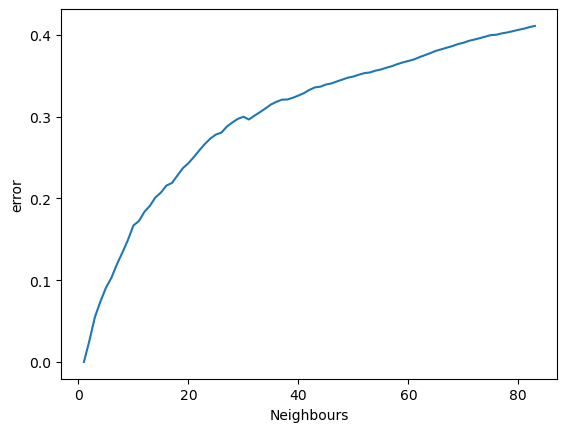

In [137]:
sns.lineplot(data = Training_house_price_k, x ='Neighbours' ,y = 'error')
plt.savefig('D:/error_lineplot_upward.png')

In [141]:
min_error =Training_house_price_k ['error'].min()
print(f'minimum error : {min_error}')

minimum error : 0.0


In [143]:
y_pred = Knn_house_price_train.predict(X_test)
y_pred

array([ 93.58987952,  41.69048193,  53.45560241, ...,  40.80198795,
       119.67807229,  96.23686747])

In [145]:
error_val = []
for i in range(1, 84):
    Knn_house_price = KNeighborsRegressor(n_neighbors=i)
    Knn_house_price_train = Knn_house_price.fit(X_train, y_train)
    y_pred = Knn_house_price_train.predict(X_test)  # move prediction here
    err = 1 - r2_score(y_test, y_pred)  # now uses updated prediction
    error_val.append(err)

In [146]:
Validation_house_price_k =pd.DataFrame({'Neighbour':range(1,84), 'error': error_val})
Validation_house_price_k.sort_values('error')

,Neighbour,error
0,1,0.085260
4,5,0.103005
5,6,0.105091
2,3,0.108332
3,4,0.112340
...,...,...
78,79,0.279218
79,80,0.280805
80,81,0.282561
81,82,0.282843


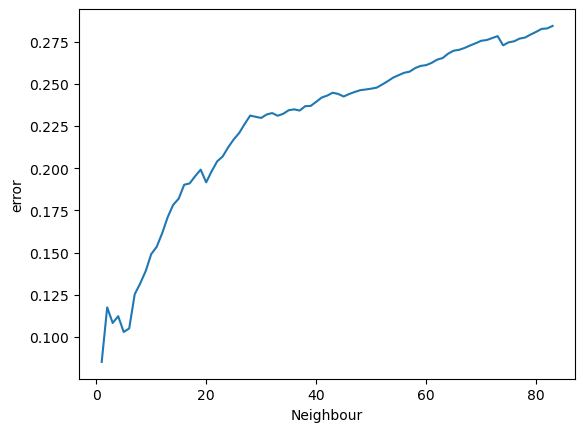

In [147]:
sns.lineplot(data = Validation_house_price_k, x ='Neighbour',y ='error')
plt.savefig('D:/error_lineplot_downward.png')


### saving the model

In [68]:
joblib.dump(Knn_house_price,'House_price_pred_v1')

['House_price_pred_v1']